# B. State purification with qubit-mediated measurement

In [1]:
# ruff: noqa
import os

os.sys.path.append("..")
from feedback_grape.fgrape import optimize_pulse_with_feedback
import jax.numpy as jnp

## The cavity is initially in a  mixed state --> Goal is to purify the state

We are trying to maximize the property determined by $tr (\rho_{\text{cav}}^2)$ which is the purity

In the following, we consider an adaptive measurement
scheme, demonstrated in a series of experiments on Rydberg atoms interacting
with microwave cavities. In this scheme, the
cavity is coupled to an ancilla qubit, which can then be
read out to update our knowledge of the quantum state of
the cavity.

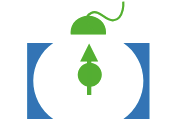

In [2]:
# initial state is a thermal state
n_average = 2
N_cavity = 30
# natural logarithm
beta = jnp.log((1 / n_average) + 1)
diags = jnp.exp(-beta * jnp.arange(N_cavity))
normalized_diags = diags / jnp.sum(diags, axis=0)
rho_cav = jnp.diag(normalized_diags)

### Now the thing is here, we don't need a rho_final because the purity or the reward that we want to maximize is $tr (\rho_{\text{cav}}^2)$.
Unlike fidelity expressions which wants to find how close to states are

## Next Step is to construct our POVM

In [3]:
from feedback_grape.utils.operators import cosm, sinm

In [ ]:
from feedback_grape.utils.operators import create, destroy
import jax


def povm_measure_operator(measurement_outcome, gamma, delta):
    """
    POVM for the measurement of the cavity state.
    returns Mm ( NOT the POVM element Em = Mm_dag @ Mm ), given measurement_outcome m, gamma and delta
    """
    number_operator = create(N_cavity) @ destroy(N_cavity)
    angle = (gamma * number_operator) + delta / 2
    return jnp.where(
        measurement_outcome == 1,
        cosm(angle),
        sinm(angle),
    )

In [ ]:
# Answer: why does RNN outputs two the same, then two the same, then two the same and so on? -> calculate during forward proagation then again during back_propagation

initial_params = {
    "POVM": [0.1, -3 * jnp.pi / 2],
}
result = optimize_pulse_with_feedback(
    U_0=rho_cav,
    C_target=None,
    parameterized_gates=[povm_measure_operator],
    measurement_indices=[0],
    initial_params=initial_params,
    num_time_steps=5,
    mode="lookup",
    goal="purity",
    max_iter=1000,
    convergence_threshold=1e-20,
    learning_rate=0.01,
    type="density",
    batch_size=10,
)

parameter shapes: [2]
Number of parameters: 2
Iteration 0, Loss: 0.537615
Iteration 10, Loss: 0.744727
Iteration 20, Loss: 0.870459
Iteration 30, Loss: 0.998326
Iteration 40, Loss: 1.239688
Iteration 50, Loss: 1.327510
Iteration 60, Loss: 1.212395
Iteration 70, Loss: 1.217156
Iteration 80, Loss: 1.201432
Iteration 90, Loss: 1.003520
Iteration 100, Loss: 1.329733
Iteration 110, Loss: 0.662769
Iteration 120, Loss: 0.903293
Iteration 130, Loss: 0.946347
Iteration 140, Loss: 1.402054
Iteration 150, Loss: 1.277418
Iteration 160, Loss: 1.234001
Iteration 170, Loss: 1.304431
Iteration 180, Loss: 1.225268
Iteration 190, Loss: 1.118462
Iteration 200, Loss: 1.008263
Iteration 210, Loss: 1.255900
Iteration 220, Loss: 0.957033
Iteration 230, Loss: 1.089086
Iteration 240, Loss: 1.204695
Iteration 250, Loss: 1.206634
Iteration 260, Loss: 1.218552
Iteration 270, Loss: 1.029488
Iteration 280, Loss: 1.471860
Iteration 290, Loss: 0.980256
Iteration 300, Loss: 0.994297
Iteration 310, Loss: 0.586527
Itera

In [6]:
result

FgResult(optimized_trainable_parameters={'initial_params': [Array([ 0.01577471, -4.62983302], dtype=float64)], 'lookup_table': [[Array([1.56461865, 0.05224781], dtype=float64), Array([1.53062655, 0.58382769], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([0., 0.], dtype=float64), Array([

In [7]:
print(result.final_fidelity)

None


In [8]:
print(result.final_state)

[[[ 2.44246556e-02+0.j  1.45162331e-01+0.j -3.68874802e-02+0.j ...
   -1.93720845e-03+0.j -1.58484014e-03+0.j -9.42675404e-04+0.j]
  [ 1.45162331e-01+0.j  8.64117574e-01+0.j -2.20052795e-01+0.j ...
   -1.13396112e-02+0.j -9.17836396e-03+0.j -5.52724042e-03+0.j]
  [-3.68874802e-02+0.j -2.20052795e-01+0.j  5.62036081e-02+0.j ...
    2.82663021e-03+0.j  2.25547661e-03+0.j  1.37967195e-03+0.j]
  ...
  [-1.93720845e-03+0.j -1.13396112e-02+0.j  2.82663021e-03+0.j ...
    1.84692173e-04+0.j  1.63324111e-04+0.j  8.57644376e-05+0.j]
  [-1.58484014e-03+0.j -9.17836396e-03+0.j  2.25547661e-03+0.j ...
    1.63324111e-04+0.j  1.59242262e-04+0.j  7.70532285e-05+0.j]
  [-9.42675404e-04+0.j -5.52724042e-03+0.j  1.37967195e-03+0.j ...
    8.57644376e-05+0.j  7.70532285e-05+0.j  4.21272458e-05+0.j]]

 [[ 4.01642586e-03+0.j  7.78224894e-03+0.j  7.07664804e-03+0.j ...
   -2.38997935e-03+0.j -3.06373515e-03+0.j -2.65792743e-03+0.j]
  [ 7.78224894e-03+0.j  1.54206789e-02+0.j  1.35965273e-02+0.j ...
   -4.70

In [9]:
result.optimized_trainable_parameters['lookup_table']

[[Array([1.56461865, 0.05224781], dtype=float64),
  Array([1.53062655, 0.58382769], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.], dtype=float64),
  Array([0., 0.]

In [10]:
# 0.8119213228423314
print(result.final_purity)

0.9475196247755742


In [11]:
from feedback_grape.utils.purity import purity

# the highest purity can be 0.995 if the initial params that initializes the lookup table
# are between 0 and pi rather than -pi and pi
print("initial purity:", purity(rho=rho_cav))
for i, state in enumerate(result.final_state):
    print(f"Purity of state {i}:", purity(rho=state))

initial purity: 0.20000208604889932
Purity of state 0: 0.939453826196538
Purity of state 1: 0.9461260687969052
Purity of state 2: 0.9549568275902379
Purity of state 3: 0.9861876883300558
Purity of state 4: 0.8422319801985794
Purity of state 5: 0.9549568275902379
Purity of state 6: 0.939453826196538
Purity of state 7: 0.9861876883300558
Purity of state 8: 0.9861876883300558
Purity of state 9: 0.939453826196538


In [12]:
result.returned_params

[[Array([[ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302],
         [ 0.01577471, -4.62983302]], dtype=float64)],
 [Array([[1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781],
         [1.56461865, 0.05224781]], dtype=float64)],
 [Array([[1.99075314, 0.55876107],
         [2.35070353, 0.05933769],
         [2.35070353, 0.05933769],
         [2.35070353, 0.05933769],
         [1.99075314, 0.55876107],
         [2.35070353, 0.05933769],
         [1.99075314, 0.55876107],

In [13]:
print(jax.random.PRNGKey(9))
time_step_keys = jax.random.split(jax.random.PRNGKey(9), 5)
print(time_step_keys)
for key in time_step_keys:
    print(jax.random.uniform(key))

[0 9]
[[2822284597 2722679661]
 [ 143080583 4281670255]
 [2676565412 4109519897]
 [1877436067 1979300842]
 [3339921199 4267639851]]
0.16232149317805766
0.07829857808883056
0.8422083576204116
0.23698051656885277
0.33005660981143814


In [14]:
from feedback_grape.fgrape import povm
import random

time_steps = 5

rho = rho_cav
print("initial purity:", purity(rho=rho))

rand_num = random.randint(1, 50)

time_step_keys = jax.random.split(jax.random.PRNGKey(rand_num), time_steps)
for i in range(time_steps):
    params = result.returned_params[i][0]
    print(f"params for time step {i}:", params[0])
    rho, _, _ = povm(rho, povm_measure_operator, params[0], time_step_keys[i])
    print(f"purity of rho after time step {i}", purity(rho=rho))
final_rho_cav = rho

initial purity: 0.20000208604889932
params for time step 0: [ 0.01577471 -4.62983302]
purity of rho after time step 0 0.20082501591167548
params for time step 1: [1.56461865 0.05224781]
purity of rho after time step 1 0.3857602858583585
params for time step 2: [1.99075314 0.55876107]
purity of rho after time step 2 0.4133785160425542
params for time step 3: [1.32226568 1.13857156]
purity of rho after time step 3 0.523638606927961
params for time step 4: [1.27500068 2.29608768]
purity of rho after time step 4 0.47695237516610034


In [15]:
from feedback_grape.utils.povm import (
    _probability_of_a_measurement_outcome_given_a_certain_state,
)

variables = jnp.array([0.1, -3 * jnp.pi / 2])
# variables_2 = {
#     "gamma": 0.1,
#     "delta": -3 * jnp.pi / 2,
# }
print(
    _probability_of_a_measurement_outcome_given_a_certain_state(
        rho_cav, -1, povm_measure_operator, variables
    )
)
print(
    _probability_of_a_measurement_outcome_given_a_certain_state(
        rho_cav, 1, povm_measure_operator, variables
    )
)

0.0973540364721641
0.9026459635278362


### Check stash for replacement of dict implementation

In [16]:
print("Final state after application of amplitudes:", final_rho_cav)

Final state after application of amplitudes: [[ 2.07286189e-02+0.j  2.85143666e-03+0.j  1.98421135e-02+0.j
  -5.74064777e-03+0.j  2.98741765e-02+0.j -1.52035490e-02+0.j
  -1.86543359e-03+0.j -4.78986266e-03+0.j -3.24857138e-03+0.j
   3.93527215e-04+0.j -2.70313020e-03+0.j -2.05219204e-03+0.j
  -2.74158668e-03+0.j -2.51425113e-03+0.j -1.17071733e-03+0.j
  -9.69657416e-04+0.j -7.30089095e-04+0.j -5.75605111e-04+0.j
   4.40263897e-04+0.j -1.78817787e-03+0.j -1.23804476e-03+0.j
   4.29222833e-04+0.j -2.64165724e-03+0.j -2.01131141e-03+0.j
   6.97053559e-04+0.j  3.13497076e-04+0.j -1.63137054e-03+0.j
  -4.21868264e-04+0.j  2.88429791e-04+0.j -3.28796316e-03+0.j]
 [ 2.85143666e-03+0.j  5.84137827e-03+0.j  5.50756099e-03+0.j
   1.12849689e-02+0.j  5.21606715e-02+0.j -2.18007621e-02+0.j
  -7.31314296e-03+0.j -3.71258397e-03+0.j -2.96161868e-03+0.j
  -2.11526870e-03+0.j -3.41155374e-03+0.j -7.43294433e-04+0.j
  -1.28512840e-03+0.j -3.30488853e-04+0.j -8.99407756e-04+0.j
  -2.00334191e-03+0.j -2

In [17]:
print("Final state from solver:", result.final_state)

Final state from solver: [[[ 2.44246556e-02+0.j  1.45162331e-01+0.j -3.68874802e-02+0.j ...
   -1.93720845e-03+0.j -1.58484014e-03+0.j -9.42675404e-04+0.j]
  [ 1.45162331e-01+0.j  8.64117574e-01+0.j -2.20052795e-01+0.j ...
   -1.13396112e-02+0.j -9.17836396e-03+0.j -5.52724042e-03+0.j]
  [-3.68874802e-02+0.j -2.20052795e-01+0.j  5.62036081e-02+0.j ...
    2.82663021e-03+0.j  2.25547661e-03+0.j  1.37967195e-03+0.j]
  ...
  [-1.93720845e-03+0.j -1.13396112e-02+0.j  2.82663021e-03+0.j ...
    1.84692173e-04+0.j  1.63324111e-04+0.j  8.57644376e-05+0.j]
  [-1.58484014e-03+0.j -9.17836396e-03+0.j  2.25547661e-03+0.j ...
    1.63324111e-04+0.j  1.59242262e-04+0.j  7.70532285e-05+0.j]
  [-9.42675404e-04+0.j -5.52724042e-03+0.j  1.37967195e-03+0.j ...
    8.57644376e-05+0.j  7.70532285e-05+0.j  4.21272458e-05+0.j]]

 [[ 4.01642586e-03+0.j  7.78224894e-03+0.j  7.07664804e-03+0.j ...
   -2.38997935e-03+0.j -3.06373515e-03+0.j -2.65792743e-03+0.j]
  [ 7.78224894e-03+0.j  1.54206789e-02+0.j  1.3596

In [18]:
# # Define initial state (a thermal state for example)
# import os

# os.sys.path.append("..")
# from feedback_grape.fgrape import optimize_pulse_with_feedback
# from feedback_grape.utils.operators import create, destroy, cosm, sinm
# import jax.numpy as jnp

# n_average = 2
# N_cavity = 30
# beta = jnp.log((1 / n_average) + 1)
# diags = jnp.exp(-beta * jnp.arange(N_cavity))
# normalized_diags = diags / jnp.sum(diags, axis=0)
# rho_cav = jnp.diag(normalized_diags)


# def povm_measure_operator(measurement_outcome, gamma, delta):
#     """
#     POVM for the measurement of the cavity state.
#     """
#     number_operator = create(N_cavity) @ destroy(N_cavity)
#     angle = (gamma * number_operator) + delta / 2
#     return jnp.where(
#         measurement_outcome == 1,
#         cosm(angle),
#         sinm(angle),
#     )


# def unitary_gate(gamma, delta):
#     """
#     Example unitary gate operation.
#     """
#     number_operator = create(N_cavity) @ destroy(N_cavity)
#     angle = (gamma * number_operator) + delta / 2
#     return cosm(angle)


# # Initial parameters for both gates NOTE those are really important
# initial_params = {
#     "POVM": {
#         "gamma": jnp.pi / 2,
#         "delta": jnp.pi / 2,
#     },
#     "U_qc": {
#         "gamma": jnp.pi / 2,
#         "delta": jnp.pi / 2,
#     },
# }

# # Run the optimization
# result = optimize_pulse_with_feedback(
#     U_0=rho_cav,
#     C_target=None,
#     parameterized_gates=[povm_measure_operator, unitary_gate],
#     measurement_indices=[0],  # Only the first gate is a measurement
#     initial_params=initial_params,
#     num_time_steps=5,
#     mode="nn",
#     goal="purity",
#     optimizer="adam",
#     max_iter=1000,
#     convergence_threshold=1e-6,
#     learning_rate=0.1,
#     type="density",
# )

# print(f"Final purity: {result.final_purity}")

In [19]:
import jax.numpy as jnp
import jax

initial_params = {
    "POVM": [0.1, 0.2],
    "test": [0.3, 0.4],
    "test2": 0.5,
    "test3": [0.1],
}


# refer to the old ways in older commits to keep the order while using nested dicts - does not use tree utils though
def flatten_dict(d):
    res = []
    shapes = []
    for value in d.values():
        flat_params = jax.tree_util.tree_leaves(value)
        res.append(flat_params)
        shapes.append(len(flat_params))
    return res, shapes


flat_params, shapes = flatten_dict(initial_params)
print(flat_params)
print(shapes)

[[0.1, 0.2], [0.3, 0.4], [0.5], [0.1]]
[2, 2, 1, 1]


In [20]:
print("restored_params", flat_params)

restored_params [[0.1, 0.2], [0.3, 0.4], [0.5], [0.1]]


In [21]:
jnp.array([0.1, 0.2, 0.2])

Array([0.1, 0.2, 0.2], dtype=float64)

In [22]:
batch_size = 2

In [23]:
rho_final_batched = jnp.repeat(jnp.expand_dims(rho_cav, 0), batch_size, axis=0)

In [24]:
rho_final_batched.shape

(2, 30, 30)

In [25]:
parent_key = jax.random.PRNGKey(0)
print(parent_key.shape)
rng_keys = jax.random.split(parent_key)

(2,)


In [26]:
rng_keys[0].shape

(2,)

In [27]:
print(jnp.array([1, 3]) * -jnp.array([2, 2]))

[-2 -6]
